# Lab 10 - Gaussian Mixture Models
## Imports

In [1]:
import numpy as np
import json
from tiblib import logpdf_GMM, load_iris_multiclass, train_test_split
from tiblib.classification import GaussianMixtureClassifier

## Likelihood

In [2]:

def load_gmm(filename):
    with open(filename, 'r') as f:
        gmm = json.load(f)
    W = np.asarray([c[0] for c in gmm]).squeeze()
    M = np.asarray([np.asarray(c[1]) for c in gmm]).squeeze()
    S = np.asarray([np.asarray(c[2]) for c in gmm]).squeeze()
    return W, M, S


gmm = load_gmm('../datasets/GMM_4D_3G_init.json')
X = np.load('../datasets/GMM_data_4D.npy')
pdf_gmm_correct = np.load('../datasets/GMM_4D_3G_init_ll.npy')
pdf_gmm, responsibilities = logpdf_GMM(X, gmm)

print(f'Are the computed logpdf and the reference one equal? {np.allclose(pdf_gmm, pdf_gmm_correct)}')

Are the computed logpdf and the reference one equal? True


## Gaussian Mixture Model

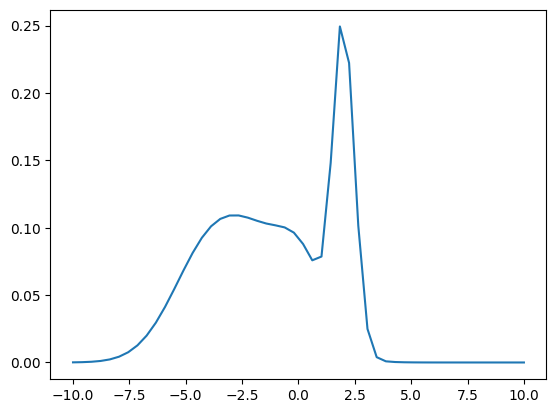

In [3]:
from matplotlib import pyplot as plt
from tiblib.classification import GaussianMixtureModel

gmm = GaussianMixtureModel(algorithm='lbg', n_components=4, stop_delta=1e-2, filename='C:\\Users\\ftibl\\Documents\\Python Scripts\\polito-mlpr\\datasets\\GMM_1D_3G_init.json', )
X = np.load('C:\\Users\\ftibl\\Documents\\Python Scripts\\polito-mlpr\\datasets\\GMM_data_1D.npy').T
gmm.fit(X)
X_lin = np.linspace(-10,10).reshape(-1,1)
density = np.exp(gmm.estimate(X_lin))

plt.plot(X_lin, density)
plt.show()

## Gaussian Mixture Classifier

In [5]:
X, y = load_iris_multiclass()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

gmc = GaussianMixtureClassifier(algorithm='lbg', alpha=0.1, psi=0.01, n_components=4)
gmc.fit(X_train,y_train)
print(f'Full covariance score: {gmc.score(X_test,y_test)}')

gmc = GaussianMixtureClassifier(algorithm='lbg', diag=True, alpha=0.1, psi=0.01, n_components=4)
gmc.fit(X_train,y_train)
print(f'Diagonal covariance score: {gmc.score(X_test,y_test)}')

gmc = GaussianMixtureClassifier(algorithm='lbg', tied=True, alpha=0.1, psi=0.01, n_components=4)
gmc.fit(X_train,y_train)
print(f'Tied covariance score: {gmc.score(X_test,y_test)}')

gmc = GaussianMixtureClassifier(algorithm='lbg', tied=True, diag=True, alpha=0.1, psi=0.01, n_components=4)
gmc.fit(X_train,y_train)
print(f'Tied diagonal covariance score: {gmc.score(X_test,y_test)}')

Full covariance score: 0.98
Diagonal covariance score: 0.94
Tied covariance score: 0.94
Tied diagonal covariance score: 0.94
